# IMPORTS

First we started with some python imports. For model building we used the <mark>**segmentation_models_pytorch library**</mark>. This has library has a lot segmentation model architechtures. Before you can import the library it needs to be ensured that the library is installed in the conda environment. For this in the anaconda terminal just type the below command to install the library:-

<div class="alert alert-block alert-success">
<b>Conda Command:</b> conda install -q segmentation-models-pytorch
</div>

Once, the libray is installed it can be imported in the script safely. We also imported the utility script Trainer for model training.

In [1]:
import pandas as pd
import numpy as np
import segmentation_models_pytorch as smp
from Utilities.Trainer import Trainer
import torch
import torch.nn as nn
from torchvision import models
import torch.multiprocessing as mp
import matplotlib.pyplot as plt
%matplotlib inline

The below statement helps in better error tracking when training is done in cuda. More details about this can be found in the below url:-

https://pytorch.org/docs/stable/notes/cuda.html

In [2]:
CUDA_LAUNCH_BLOCKING="1"

# Model Building

Next a FPN model with Resnet34 encoder was created with imagenet weights from the smp library.

In [3]:
torch.manual_seed(42)
ENCODER = 'resnet34'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = 6
ACTIVATION = None # could be None for logits or 'softmax2d' for multiclass segmentation

# create segmentation model with pretrained encoder
model = smp.FPN(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    in_channels=3,
    classes=CLASSES, 
    activation=ACTIVATION,
)
print(model)

FPN(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

# Model Training

Next the model training was started with 20 epochs and initial learning rate as 5e-04. The model checkpoint was saved whenever the validation dice was reported the greater than the previous best validation dice.

In the below results you can see the training starting from epoch 6. This is because the kernel was initally interuptted after epoch 5. So, I had to start all over again. Since, checkpoint was saved upto epoch number 5 so it started from epoch 6.

In [4]:
lr = 5e-04
epochs = 20
path = "./Models/model_fpn_resnet.pth"

In [5]:
model_trainer = Trainer(model, lr, epochs, path)
print(f"Current Device is GPU: {torch.cuda.current_device()}")
print(f"Total memory allocated in GB: {round(torch.cuda.memory_allocated(0)/1024**3,1)}")
print(f"Total memory cached in GB: {round(torch.cuda.memory_reserved(0)/1024**3,1)}")
model_trainer.start()

  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Current Device is GPU: 0
Total memory allocated in GB: 0.3
Total memory cached in GB: 0.6
Learning Rate =  0.0005
Starting epoch: 6 | phase: train | ⏰: 21:23:36


100%|██████████████████████████████████████████████████████████████████| 310/310 [04:34<00:00,  1.13it/s, loss=0.00984]
C:\Users\SIDDHARTA\OneDrive\Documents\NEU-DET\Utilities\Meter.py:40: RuntimeWarning: Mean of empty slice
  dice_neg = np.nanmean(self.dice_neg_scores)
  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0787 | IoU: 0.5754 | dice: 0.6997 | dice_neg: nan | dice_pos: 0.6997
Starting epoch: 6 | phase: val | ⏰: 21:28:11


100%|██████████████████████████████████████████████████████████████████| 133/133 [00:42<00:00,  3.10it/s, loss=0.00756]


Loss: 0.0605 | IoU: 0.6266 | dice: 0.7500 | dice_neg: nan | dice_pos: 0.7500
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 7 | phase: train | ⏰: 21:28:55


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0755 | IoU: 0.5887 | dice: 0.7123 | dice_neg: nan | dice_pos: 0.7123
Starting epoch: 7 | phase: val | ⏰: 21:33:22


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0623 | IoU: 0.6139 | dice: 0.7323 | dice_neg: nan | dice_pos: 0.7323

Learning Rate =  0.0005
Starting epoch: 8 | phase: train | ⏰: 21:34:06


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0634 | IoU: 0.6269 | dice: 0.7497 | dice_neg: nan | dice_pos: 0.7497
Starting epoch: 8 | phase: val | ⏰: 21:38:21


100%|██████████████████████████████████████████████████████████████████| 133/133 [00:35<00:00,  3.79it/s, loss=0.00722]


Loss: 0.0578 | IoU: 0.6515 | dice: 0.7718 | dice_neg: nan | dice_pos: 0.7718
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 9 | phase: train | ⏰: 21:38:57


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0608 | IoU: 0.6423 | dice: 0.7638 | dice_neg: nan | dice_pos: 0.7638
Starting epoch: 9 | phase: val | ⏰: 21:43:23


100%|██████████████████████████████████████████████████████████████████| 133/133 [00:41<00:00,  3.19it/s, loss=0.00705]


Loss: 0.0564 | IoU: 0.6606 | dice: 0.7793 | dice_neg: nan | dice_pos: 0.7793
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 10 | phase: train | ⏰: 21:44:05


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0565 | IoU: 0.6605 | dice: 0.7796 | dice_neg: nan | dice_pos: 0.7796
Starting epoch: 10 | phase: val | ⏰: 21:48:32


100%|███████████████████████████████████████████████████████████████████| 133/133 [00:41<00:00,  3.19it/s, loss=0.0074]


Loss: 0.0592 | IoU: 0.6653 | dice: 0.7833 | dice_neg: nan | dice_pos: 0.7833
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 11 | phase: train | ⏰: 21:49:14


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0551 | IoU: 0.6751 | dice: 0.7926 | dice_neg: nan | dice_pos: 0.7926
Starting epoch: 11 | phase: val | ⏰: 21:53:40


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0667 | IoU: 0.6281 | dice: 0.7439 | dice_neg: nan | dice_pos: 0.7439

Learning Rate =  0.0005
Starting epoch: 12 | phase: train | ⏰: 21:54:22


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0539 | IoU: 0.6721 | dice: 0.7882 | dice_neg: nan | dice_pos: 0.7882
Starting epoch: 12 | phase: val | ⏰: 21:58:47


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0569 | IoU: 0.6609 | dice: 0.7795 | dice_neg: nan | dice_pos: 0.7795

Learning Rate =  0.0005
Starting epoch: 13 | phase: train | ⏰: 21:59:29


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0561 | IoU: 0.6688 | dice: 0.7851 | dice_neg: nan | dice_pos: 0.7851
Starting epoch: 13 | phase: val | ⏰: 22:04:10


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0584 | IoU: 0.6530 | dice: 0.7722 | dice_neg: nan | dice_pos: 0.7722

Learning Rate =  0.0005
Starting epoch: 14 | phase: train | ⏰: 22:04:51


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0610 | IoU: 0.6478 | dice: 0.7664 | dice_neg: nan | dice_pos: 0.7664
Starting epoch: 14 | phase: val | ⏰: 22:09:16


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0590 | IoU: 0.6520 | dice: 0.7703 | dice_neg: nan | dice_pos: 0.7703
Epoch     9: reducing learning rate of group 0 to 5.0000e-05.

Learning Rate =  5e-05
Starting epoch: 15 | phase: train | ⏰: 22:09:58


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0543 | IoU: 0.6792 | dice: 0.7949 | dice_neg: nan | dice_pos: 0.7949
Starting epoch: 15 | phase: val | ⏰: 22:23:02


100%|██████████████████████████████████████████████████████████████████| 133/133 [00:17<00:00,  7.47it/s, loss=0.00673]


Loss: 0.0538 | IoU: 0.6685 | dice: 0.7846 | dice_neg: nan | dice_pos: 0.7846
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  5e-05
Starting epoch: 16 | phase: train | ⏰: 22:23:21


100%|██████████████████████████████████████████████████████████████████| 310/310 [01:49<00:00,  2.83it/s, loss=0.00628]


Loss: 0.0502 | IoU: 0.6910 | dice: 0.8052 | dice_neg: nan | dice_pos: 0.8052


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Starting epoch: 16 | phase: val | ⏰: 22:25:11


100%|██████████████████████████████████████████████████████████████████| 133/133 [00:37<00:00,  3.54it/s, loss=0.00651]


Loss: 0.0520 | IoU: 0.6784 | dice: 0.7935 | dice_neg: nan | dice_pos: 0.7935
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  5e-05
Starting epoch: 17 | phase: train | ⏰: 22:25:49


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0484 | IoU: 0.7015 | dice: 0.8139 | dice_neg: nan | dice_pos: 0.8139
Starting epoch: 17 | phase: val | ⏰: 22:30:14


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0523 | IoU: 0.6717 | dice: 0.7875 | dice_neg: nan | dice_pos: 0.7875

Learning Rate =  5e-05
Starting epoch: 18 | phase: train | ⏰: 22:30:56


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0471 | IoU: 0.7075 | dice: 0.8189 | dice_neg: nan | dice_pos: 0.8189
Starting epoch: 18 | phase: val | ⏰: 22:35:21


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0534 | IoU: 0.6712 | dice: 0.7866 | dice_neg: nan | dice_pos: 0.7866

Learning Rate =  5e-05
Starting epoch: 19 | phase: train | ⏰: 22:36:02


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0465 | IoU: 0.7046 | dice: 0.8163 | dice_neg: nan | dice_pos: 0.8163
Starting epoch: 19 | phase: val | ⏰: 22:40:28


100%|██████████████████████████████████████████████████████████████████| 133/133 [00:41<00:00,  3.18it/s, loss=0.00659]


Loss: 0.0527 | IoU: 0.6818 | dice: 0.7963 | dice_neg: nan | dice_pos: 0.7963
******** New optimal found, saving state ********



After the model training was done the loss, dice_scores and iou_scores were plotted. 

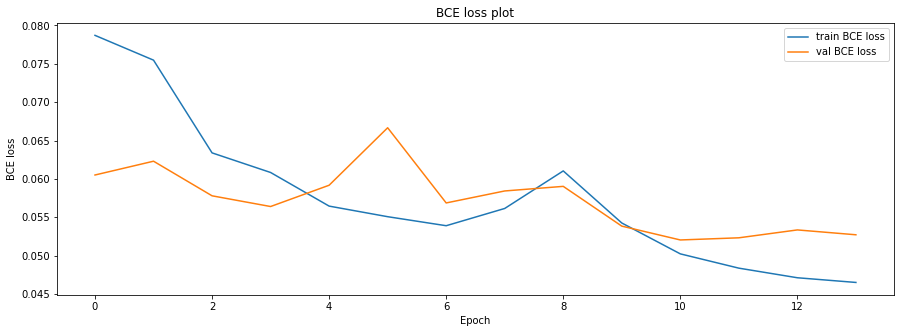

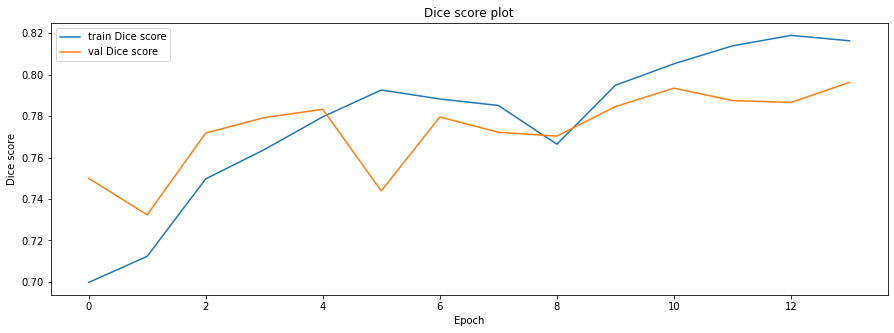

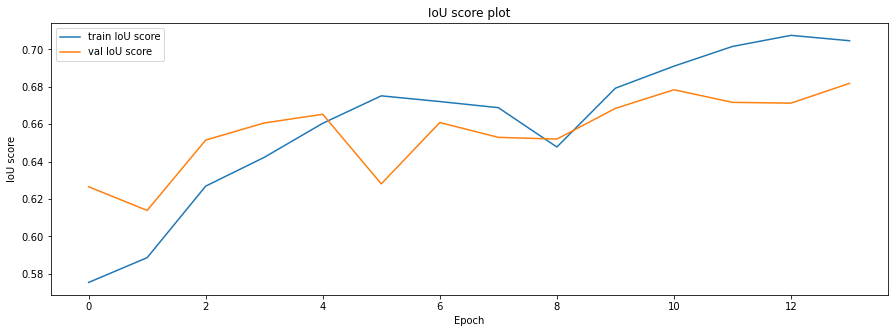

In [6]:
losses = model_trainer.losses
dice_scores = model_trainer.dice_scores # overall dice
iou_scores = model_trainer.iou_scores

def plot(scores, name):
    plt.figure(figsize=(15,5))
    plt.plot(range(len(scores["train"])), scores["train"], label=f'train {name}')
    plt.plot(range(len(scores["train"])), scores["val"], label=f'val {name}')
    plt.title(f'{name} plot'); plt.xlabel('Epoch'); plt.ylabel(f'{name}');
    plt.legend(); 
    plt.show()

plot(losses, "BCE loss")
plot(dice_scores, "Dice score")
plot(iou_scores, "IoU score")

The above results the overall training and validation dice and IoU goes up with epochs and training and validation loss goes down with epochs.

# Convert to ONNX

Lastly the trained model is converted to ONNX format using the Utility script ONNX_Converter.py.

In [1]:
! python ./Utilities/ONNX_converter.py FPN resnet34  imagenet  6 ./Models/model_fpn_resnet.pth ./ONNX_models/fpn_resnet.onnx

Model name :FPN
Model checkpoint path is :./Models/model_fpn_resnet.pth
Model output path is :./ONNX_models/fpn_resnet.onnx
Successfully converted the model to onnx format.
